# Prophet Trend

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

### 1. Reading the Dataset

In [2]:
df = pd.read_csv('../UPDATE-TSA-NOTEBOOKS/Data/HospitalityEmployees.csv')
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
Date         348 non-null object
Employees    348 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


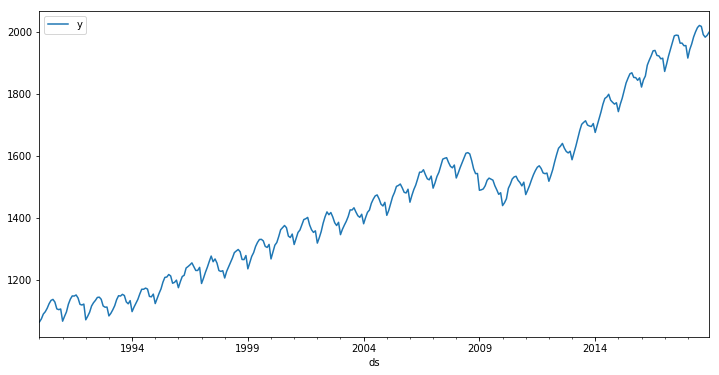

In [6]:
df.plot(x='ds',y='y',figsize=(12,6));

### 2. Model

In [7]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')

/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
forecast = m.predict(future)

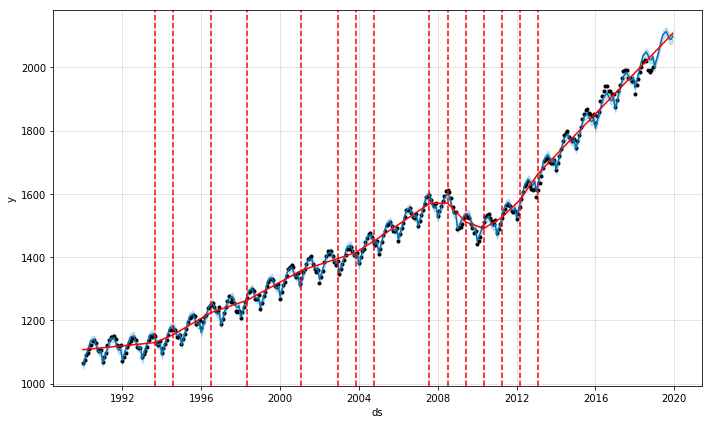

In [11]:
# It shows the major points where the trend line happened to change
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output3.png');